In [10]:
import pandas as pd
import numpy as np

df = pd.read_csv('../log.csv', sep=';')

In [2]:
df.head(5)

,timestamp,partition,vectorClock,loss,fMeasure
0,1580227638115,1,0,1.140626,0.410997
1,1580227639451,2,0,1.164432,0.410997
2,1580227640023,0,0,1.113485,0.379327
3,1580227640564,3,0,1.111459,0.410997
4,1580227642452,1,1,1.032711,0.379327


In [3]:
numPartitions = 4

In [4]:
maxVC = [0 for i in range(numPartitions)]
for p in range(numPartitions):
    maxWithinPartition = max(df[df['partition'] == p]['vectorClock'])
    maxVC[p] = max(maxVC[p], maxWithinPartition)
maxVC = min(maxVC)
maxVC

880

In [5]:
df = df[df['vectorClock'] <= maxVC].reset_index().sort_values('vectorClock')

In [6]:
data = {
    **{'loss'+str(i): [] for i in range(numPartitions)},
    **{'fMesaure'+str(i): [] for i in range(numPartitions)}
}

for p in range(numPartitions):
    for index, row in df[df['partition'] == p].iterrows():
        data['loss'+str(p)] += [row['loss']]
        data['fMesaure'+str(p)] += [row['fMeasure']]

In [7]:
data = pd.DataFrame(data)

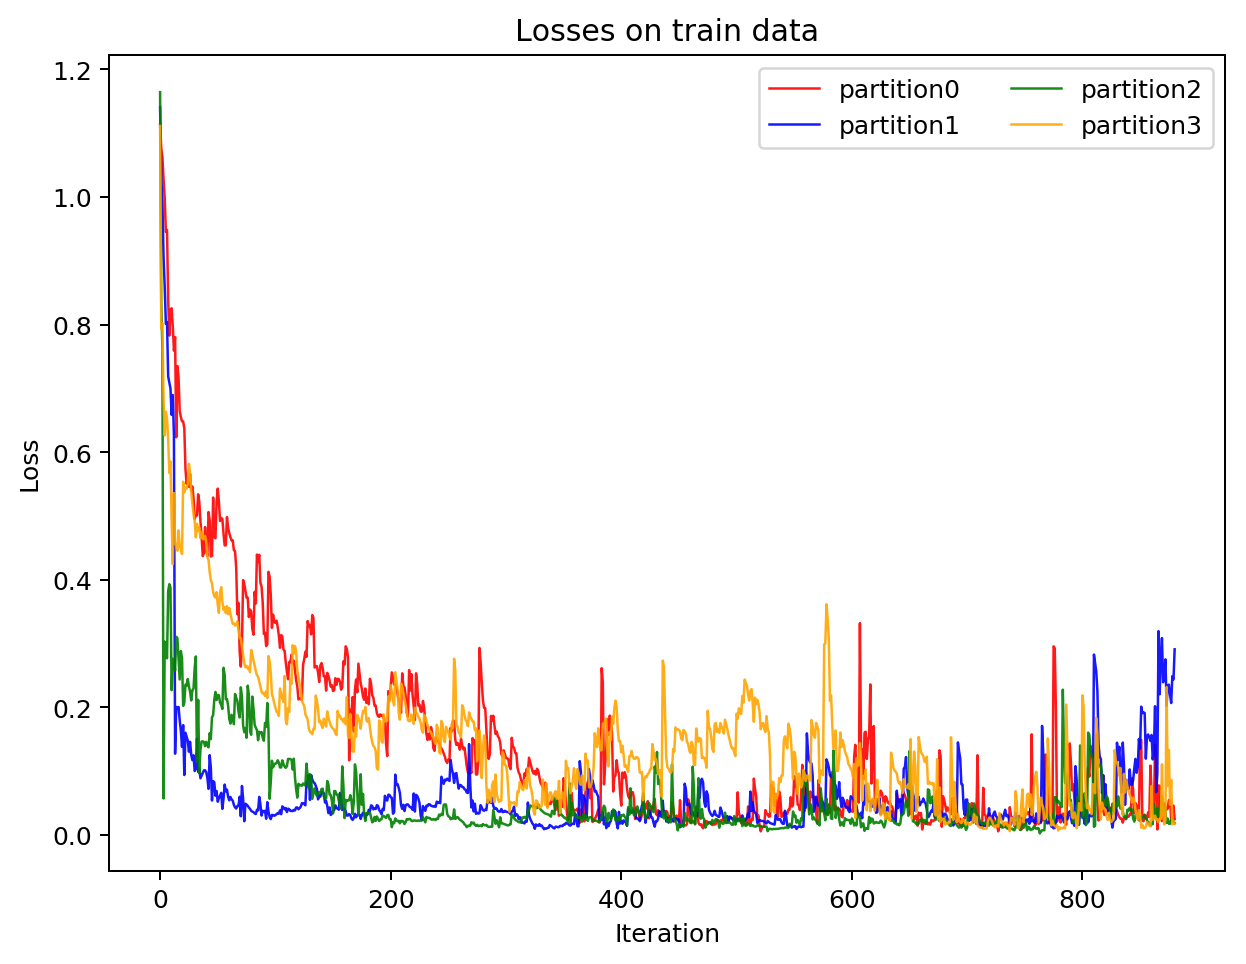

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, ylim

figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

data['x'] = [i for i in range(len(data))]

# create a color palette
palette = ['red', 'blue', 'green', 'orange']

for i in range(numPartitions):
    col = 'loss' + str(i)
    plt.plot(data['x'], data[col], marker='', color=palette[i], linewidth=1, alpha=0.9, label='partition'+str(i))

#ylim(0, 1e-4)
plt.title('Losses on train data')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend(loc=1, ncol=2)
plt.show()

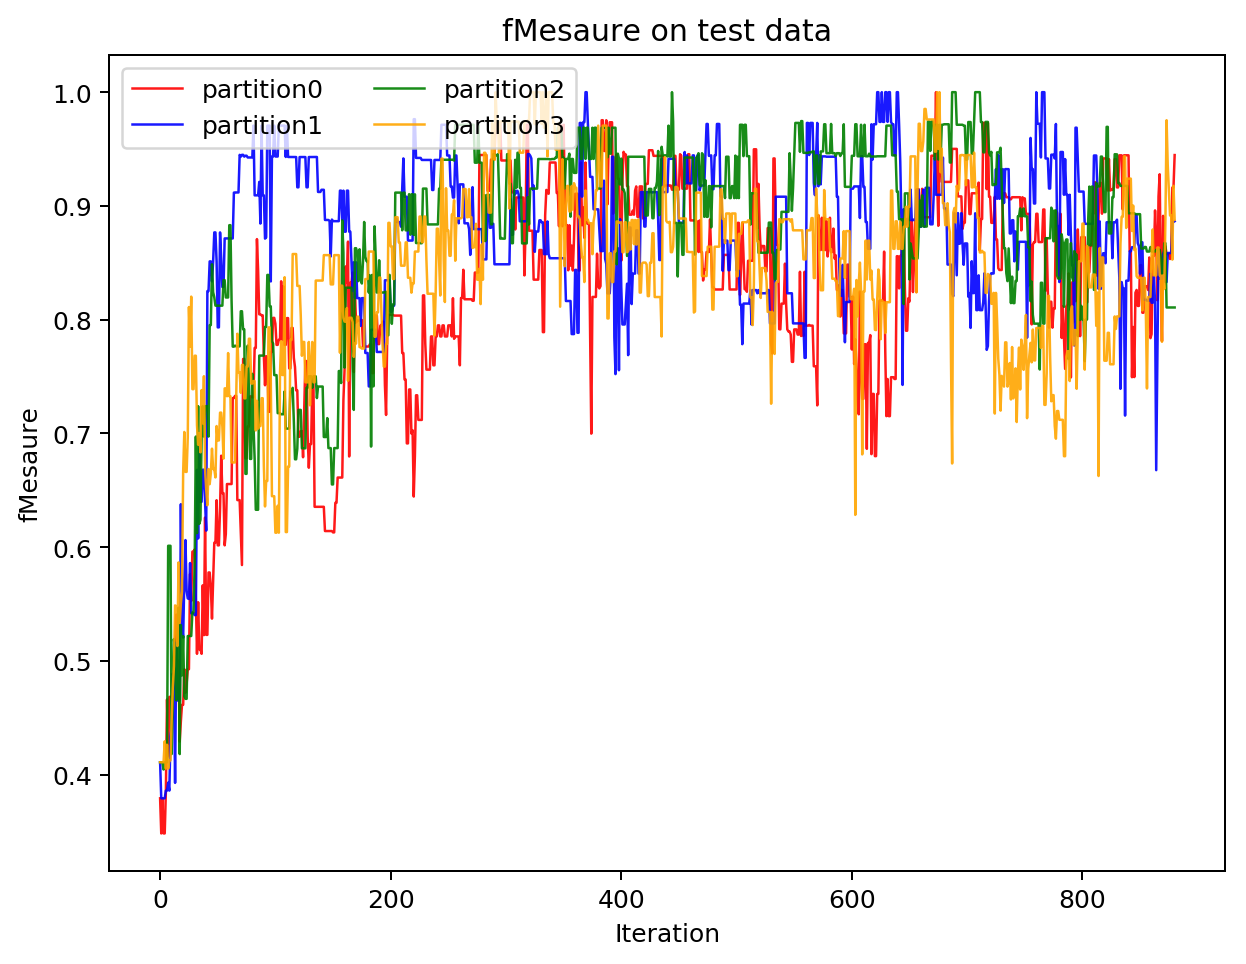

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, ylim

figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

data['x'] = [i for i in range(len(data))]

# create a color palette
palette = ['red', 'blue', 'green', 'orange']

for i in range(numPartitions):
    col = 'fMesaure' + str(i)
    plt.plot(data['x'], data[col], marker='', color=palette[i], linewidth=1, alpha=0.9, label='partition'+str(i))

#ylim(0, 1e-4)
plt.title('fMesaure on test data')
plt.ylabel('fMesaure')
plt.xlabel('Iteration')
plt.legend(loc=2, ncol=2)
plt.show()